<a href="https://colab.research.google.com/github/aniketAnvekar/Sequential-Sentence-Classification/blob/main/Sequential_Sentence_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Sequence_Classification/train.txt',delimiter='\t',names=['labels','text'])
data.head()

,labels,text
0,###24293578,NaN
1,OBJECTIVE,To investigate the efficacy of 6 weeks of dail...
2,METHODS,A total of 125 patients with primary knee OA w...
3,METHODS,Outcome measures included pain reduction and i...
4,METHODS,Pain was assessed using the visual analog pain...


In [3]:
data.dropna(subset=['text'], inplace=True)
data.head(12)

,labels,text
1,OBJECTIVE,To investigate the efficacy of 6 weeks of dail...
2,METHODS,A total of 125 patients with primary knee OA w...
3,METHODS,Outcome measures included pain reduction and i...
4,METHODS,Pain was assessed using the visual analog pain...
5,METHODS,Secondary outcome measures included the Wester...
6,METHODS,"Serum levels of interleukin 1 ( IL-1 ) , IL-6 ..."
7,RESULTS,There was a clinically relevant reduction in t...
8,RESULTS,The mean difference between treatment arms ( 9...
9,RESULTS,"Further , there was a clinically relevant redu..."
10,RESULTS,These differences remained significant at 12 w...


In [ ]:
data.labels.unique()

array(['OBJECTIVE', 'METHODS', 'RESULTS', 'CONCLUSIONS', 'BACKGROUND'],
      dtype=object)

In [ ]:
data.labels.value_counts()

METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: labels, dtype: int64

In [4]:
train_sentences = data["text"].tolist()
len(train_sentences)

180040

In [ ]:
train_sentences[:7]

['To investigate the efficacy of 6 weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at 12 weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .',
 'A total of 125 patients with primary knee OA were randomized 1:1 ; 63 received 7.5 mg/day of prednisolone and 62 received placebo for 6 weeks .',
 'Outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'Pain was assessed using the visual analog pain scale ( 0-100 mm ) .',
 'Secondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and 6-min walk distance ( 6MWD ) .',
 'Serum levels of interleukin 1 ( IL-1 ) , IL-6 , tumor necrosis factor ( TNF ) - , and high-sensitivity C-reactive protein ( hsCRP ) were measured .',
 'There was

In [5]:
import re
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
def clean_text(data, current_text_field, new_text_field_name):
  data[new_text_field_name] = data[current_text_field].str.lower()
  data[new_text_field_name] = data[new_text_field_name].apply(lambda elem: re.sub(r'[^\w\s]', '', elem))
  data[new_text_field_name] = data[new_text_field_name].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
  return data

In [7]:
data_clean = clean_text(data, 'text', 'cleaned_text')
data_clean.head(12)

,labels,text,cleaned_text
1,OBJECTIVE,To investigate the efficacy of 6 weeks of dail...,investigate efficacy 6 weeks daily lowdose ora...
2,METHODS,A total of 125 patients with primary knee OA w...,total 125 patients primary knee oa randomized ...
3,METHODS,Outcome measures included pain reduction and i...,outcome measures included pain reduction impro...
4,METHODS,Pain was assessed using the visual analog pain...,pain assessed using visual analog pain scale 0...
5,METHODS,Secondary outcome measures included the Wester...,secondary outcome measures included western on...
6,METHODS,"Serum levels of interleukin 1 ( IL-1 ) , IL-6 ...",serum levels interleukin 1 il1 il6 tumor necro...
7,RESULTS,There was a clinically relevant reduction in t...,clinically relevant reduction intervention gro...
8,RESULTS,The mean difference between treatment arms ( 9...,mean difference treatment arms 95 ci 109 4818 ...
9,RESULTS,"Further , there was a clinically relevant redu...",clinically relevant reduction serum levels il1...
10,RESULTS,These differences remained significant at 12 w...,differences remained significant 12 weeks


In [8]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [9]:
def get_tokens(data, current_text_field, new_text_field_name):
  data[new_text_field_name] = data[current_text_field].apply(lambda x: word_tokenize(x))
  return data

In [11]:
tokens_df = get_tokens(data_clean, 'cleaned_text', 'tokens')
tokens_df.head(12)

,labels,text,cleaned_text,tokens
1,OBJECTIVE,To investigate the efficacy of 6 weeks of dail...,investigate efficacy 6 weeks daily lowdose ora...,"[investigate, efficacy, 6, weeks, daily, lowdo..."
2,METHODS,A total of 125 patients with primary knee OA w...,total 125 patients primary knee oa randomized ...,"[total, 125, patients, primary, knee, oa, rand..."
3,METHODS,Outcome measures included pain reduction and i...,outcome measures included pain reduction impro...,"[outcome, measures, included, pain, reduction,..."
4,METHODS,Pain was assessed using the visual analog pain...,pain assessed using visual analog pain scale 0...,"[pain, assessed, using, visual, analog, pain, ..."
5,METHODS,Secondary outcome measures included the Wester...,secondary outcome measures included western on...,"[secondary, outcome, measures, included, weste..."
6,METHODS,"Serum levels of interleukin 1 ( IL-1 ) , IL-6 ...",serum levels interleukin 1 il1 il6 tumor necro...,"[serum, levels, interleukin, 1, il1, il6, tumo..."
7,RESULTS,There was a clinically relevant reduction in t...,clinically relevant reduction intervention gro...,"[clinically, relevant, reduction, intervention..."
8,RESULTS,The mean difference between treatment arms ( 9...,mean difference treatment arms 95 ci 109 4818 ...,"[mean, difference, treatment, arms, 95, ci, 10..."
9,RESULTS,"Further , there was a clinically relevant redu...",clinically relevant reduction serum levels il1...,"[clinically, relevant, reduction, serum, level..."
10,RESULTS,These differences remained significant at 12 w...,differences remained significant 12 weeks,"[differences, remained, significant, 12, weeks]"


In [12]:
tokens_list = tokens_df["tokens"].tolist()
len(tokens_list)

180040

In [13]:
token_corpus = []

for l in tokens_list:
  for token in l:
    token_corpus.append(token)


In [ ]:
len(set(token_corpus))

89024

In [14]:
train_sentences_clean = data["cleaned_text"].tolist()
len(train_sentences_clean)

180040

In [15]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)
train_labels_one_hot = one_hot_encoder.fit_transform(data["labels"].to_numpy().reshape(-1, 1))

In [16]:
train_labels_one_hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [17]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(data["labels"].to_numpy())

train_labels_encoded

array([3, 2, 2, ..., 4, 1, 1])

In [18]:
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_
num_classes, class_names

(5, array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create a pipeline
model = Pipeline([
  ("tf-idf", TfidfVectorizer()),
  ("clf", MultinomialNB())
])

# Fit the pipeline to the training data
model.fit(X=train_sentences_clean, y=train_labels_encoded)

Pipeline(steps=[('tf-idf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [20]:
####Validating model


data_val = pd.read_csv('/content/drive/MyDrive/Sequence_Classification/dev.txt',delimiter='\t',names=['labels','text'])
data_val.head()

,labels,text
0,###24290286,NaN
1,BACKGROUND,IgE sensitization to Aspergillus fumigatus and...
2,BACKGROUND,It is not clear whether these patients would b...
3,OBJECTIVE,We sought to determine whether a 3-month cours...
4,METHODS,Asthmatic patients who were IgE sensitized to ...


In [21]:
data_val.dropna(subset=['text'], inplace=True)
data_val.head(12)

,labels,text
1,BACKGROUND,IgE sensitization to Aspergillus fumigatus and...
2,BACKGROUND,It is not clear whether these patients would b...
3,OBJECTIVE,We sought to determine whether a 3-month cours...
4,METHODS,Asthmatic patients who were IgE sensitized to ...
5,METHODS,Primary outcomes were improvement in quality o...
6,RESULTS,Sixty-five patients were randomized .
7,RESULTS,Fifty-nine patients started treatment ( 32 rec...
8,RESULTS,Fifty-six patients took the full 3 months of m...
9,RESULTS,"Between the voriconazole and placebo groups , ..."
10,CONCLUSIONS,We were unable to show a beneficial effect of ...


In [22]:
data_clean_val = clean_text(data_val, 'text', 'cleaned_text')
data_clean_val.head(12)

,labels,text,cleaned_text
1,BACKGROUND,IgE sensitization to Aspergillus fumigatus and...,ige sensitization aspergillus fumigatus positi...
2,BACKGROUND,It is not clear whether these patients would b...,clear whether patients would benefit antifunga...
3,OBJECTIVE,We sought to determine whether a 3-month cours...,sought determine whether 3month course voricon...
4,METHODS,Asthmatic patients who were IgE sensitized to ...,asthmatic patients ige sensitized fumigatus hi...
5,METHODS,Primary outcomes were improvement in quality o...,primary outcomes improvement quality life end ...
6,RESULTS,Sixty-five patients were randomized .,sixtyfive patients randomized
7,RESULTS,Fifty-nine patients started treatment ( 32 rec...,fiftynine patients started treatment 32 receiv...
8,RESULTS,Fifty-six patients took the full 3 months of m...,fiftysix patients took full 3 months medication
9,RESULTS,"Between the voriconazole and placebo groups , ...",voriconazole placebo groups significant differ...
10,CONCLUSIONS,We were unable to show a beneficial effect of ...,unable show beneficial effect 3 months treatme...


In [23]:
val_sentences_clean = data_clean_val["cleaned_text"].tolist()
len(val_sentences_clean)

30212

In [24]:
val_labels_encoded = label_encoder.fit_transform(data_clean_val["labels"].to_numpy())

val_labels_encoded

array([0, 0, 3, ..., 4, 1, 1])

In [25]:
val_labels_one_hot = one_hot_encoder.fit_transform(data_clean_val["labels"].to_numpy().reshape(-1, 1))

In [26]:
model.score(X=val_sentences_clean,y=val_labels_encoded)

0.7044220839401563

In [27]:
preds = model.predict(val_sentences_clean)
preds

array([4, 1, 2, ..., 4, 4, 1])

In [28]:
sent_lens = [len(sentence.split()) for sentence in train_sentences_clean]
avg_sent_len = np.mean(sent_lens)
f"Average lenght of sentence in the train corpus is {avg_sent_len}"

'Average lenght of sentence in the train corpus is 14.820523217062876'

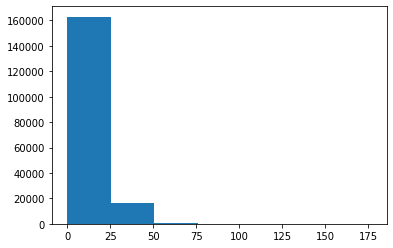

In [ ]:
import matplotlib.pyplot as plt
plt.hist(sent_lens, bins=7);

In [29]:
output_seq_len = int(np.percentile(sent_lens, 95))
output_seq_len

f"95% of the sentences in our training set have a length of {output_seq_len} tokens or less."

'95% of the sentences in our training set have a length of 30 tokens or less.'

In [30]:
max_tokens = 89024

In [31]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

text_vectorizer = TextVectorization(max_tokens=max_tokens, 
                                    output_sequence_length=30) 

In [32]:
text_vectorizer.adapt(train_sentences_clean)

In [33]:
import random
target_sentence = random.choice(train_sentences_clean)
print(f"Text:\n{target_sentence}")
print(f"\nLength of text: {len(target_sentence.split())}")
print(f"\nVectorized text:\n{text_vectorizer([target_sentence])}")

Text:
dosage cinacalcet optimized patient order obtain reduction parathyroid hormone pth within normal limits enabling maintenance adequate calcemic values

Length of text: 18

Vectorized text:
[[ 1571  8127  3879    90   922  3090   130  5549  1146  3639   174   380
   2974  7954   602  1423 46404   295     0     0     0     0     0     0
      0     0     0     0     0     0]]


In [34]:
# No.of words in our training vocabulary
rct_20k_text_vocab = text_vectorizer.get_vocabulary()
print(f"Number of words in vocabulary: {len(rct_20k_text_vocab)}"), 
print(f"Most common words in the vocabulary: {rct_20k_text_vocab[:5]}")
print(f"Least common words in the vocabulary: {rct_20k_text_vocab[-5:]}")

Number of words in vocabulary: 89022
Most common words in the vocabulary: ['', '[UNK]', 'patients', 'group', 'p']
Least common words in the vocabulary: ['000000752', '0000005', '000000154108', '0000001', '0000000072']


In [35]:
import tensorflow as tf
from tensorflow.keras import layers

In [36]:
# Create token embedding layer
token_embed = layers.Embedding(input_dim=len(rct_20k_text_vocab), # length of vocabulary
                               output_dim=128, # Note: different embedding sizes result in drastically different numbers of parameters to train
                               # Use masking to handle variable sequence lengths (save space)
                               mask_zero=True,
                               name="token_embedding") 


print(f"Sentence before vectorization:\n{target_sentence}\n")
vectorized_sentence = text_vectorizer([target_sentence])
print(f"Sentence after vectorization (before embedding):\n{vectorized_sentence}\n")
embedded_sentence = token_embed(vectorized_sentence)
print(f"Sentence after embedding:\n{embedded_sentence}\n")
print(f"Embedded sentence shape: {embedded_sentence.shape}")

Sentence before vectorization:
dosage cinacalcet optimized patient order obtain reduction parathyroid hormone pth within normal limits enabling maintenance adequate calcemic values

Sentence after vectorization (before embedding):
[[ 1571  8127  3879    90   922  3090   130  5549  1146  3639   174   380
   2974  7954   602  1423 46404   295     0     0     0     0     0     0
      0     0     0     0     0     0]]

Sentence after embedding:
[[[-0.03186885 -0.0008867   0.02572978 ... -0.04371177 -0.03813471
   -0.02377148]
  [-0.02963815 -0.04818478 -0.03441526 ... -0.02401507  0.01119604
    0.03175988]
  [ 0.00807964  0.01978525 -0.02638439 ... -0.00292419  0.03625014
   -0.00934353]
  ...
  [ 0.04723258 -0.00219239 -0.04856714 ... -0.02899929  0.03410269
   -0.03981503]
  [ 0.04723258 -0.00219239 -0.04856714 ... -0.02899929  0.03410269
   -0.03981503]
  [ 0.04723258 -0.00219239 -0.04856714 ... -0.02899929  0.03410269
   -0.03981503]]]

Embedded sentence shape: (1, 30, 128)


In [108]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences_clean, train_labels_one_hot))

In [38]:
train_dataset

<TensorSliceDataset shapes: ((), (5,)), types: (tf.string, tf.float64)>

In [109]:
# Take the TensorSliceDataset's and turn them into prefetched batches

train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [40]:
# Create 1D convolutional model to process sequences
inputs = layers.Input(shape=(1,), dtype=tf.string)
text_vectors = text_vectorizer(inputs) # vectorize text inputs
token_embeddings = token_embed(text_vectors) # create embedding
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(token_embeddings)
x = layers.GlobalAveragePooling1D()(x) # condense the output of our feature vector
outputs = layers.Dense(5, activation="softmax")(x)
model_cnn = tf.keras.Model(inputs, outputs)

# Compile 
model_cnn.compile(loss="categorical_crossentropy", # if your labels are integer form (not one hot) use sparse_categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
model_cnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 30)               0         
 ectorization)                                                   
                                                                 
 token_embedding (Embedding)  (None, 30, 128)          11394816  
                                                                 
 conv1d (Conv1D)             (None, 30, 64)            41024     
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 5)                 325   

In [107]:
valid_dataset = tf.data.Dataset.from_tensor_slices((val_sentences_clean, val_labels_one_hot))
valid_dataset = valid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [42]:
model_cnn_history = model_cnn.fit(train_dataset,
                              steps_per_epoch=int(0.15 * len(train_dataset)), # only fit on 15% of batches for faster training time
                              epochs=3,
                              validation_data=valid_dataset,
                              validation_steps=int(0.15 * len(valid_dataset))) # only validate on 15% of batches

Epoch 1/3
844/844 [==============================] - 112s 131ms/step - loss: 0.8704 - accuracy: 0.6590 - val_loss: 0.6916 - val_accuracy: 0.7349
Epoch 2/3
844/844 [==============================] - 110s 130ms/step - loss: 0.6750 - accuracy: 0.7464 - val_loss: 0.6292 - val_accuracy: 0.7686
Epoch 3/3
844/844 [==============================] - 109s 129ms/step - loss: 0.6398 - accuracy: 0.7649 - val_loss: 0.6020 - val_accuracy: 0.7808


In [43]:
model_cnn.evaluate(valid_dataset)

945/945 [==============================] - 5s 5ms/step - loss: 0.6198 - accuracy: 0.7752


[0.6198186874389648, 0.7751555442810059]

In [44]:
pred_probs = model_cnn.predict(valid_dataset)
preds = tf.argmax(pred_probs, axis=1)
preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 4, 1])>

In [ ]:
test_pred_classes = [label_encoder.classes_[pred] for pred in preds]
test_pred_classes

In [47]:
data_val["prediction"] = test_pred_classes # create column with test prediction class names
data_val["pred_prob"] = tf.reduce_max(pred_probs, axis=1).numpy() # get the maximum prediction probability
data_val["correct"] = data_val["prediction"] == data_val["labels"] # create binary column for whether the prediction is right or not
data_val.head(20)

,labels,text,cleaned_text,prediction,pred_prob,correct
1,BACKGROUND,IgE sensitization to Aspergillus fumigatus and...,ige sensitization aspergillus fumigatus positi...,BACKGROUND,0.352269,True
2,BACKGROUND,It is not clear whether these patients would b...,clear whether patients would benefit antifunga...,BACKGROUND,0.552947,True
3,OBJECTIVE,We sought to determine whether a 3-month cours...,sought determine whether 3month course voricon...,OBJECTIVE,0.788738,True
4,METHODS,Asthmatic patients who were IgE sensitized to ...,asthmatic patients ige sensitized fumigatus hi...,METHODS,0.998078,True
5,METHODS,Primary outcomes were improvement in quality o...,primary outcomes improvement quality life end ...,METHODS,0.832066,True
6,RESULTS,Sixty-five patients were randomized .,sixtyfive patients randomized,METHODS,0.650454,False
7,RESULTS,Fifty-nine patients started treatment ( 32 rec...,fiftynine patients started treatment 32 receiv...,RESULTS,0.740062,True
8,RESULTS,Fifty-six patients took the full 3 months of m...,fiftysix patients took full 3 months medication,METHODS,0.620945,False
9,RESULTS,"Between the voriconazole and placebo groups , ...",voriconazole placebo groups significant differ...,RESULTS,0.999957,True
10,CONCLUSIONS,We were unable to show a beneficial effect of ...,unable show beneficial effect 3 months treatme...,CONCLUSIONS,0.853455,True


Glove Embeddings

In [48]:
embeddings_index = {}
with open('/content/drive/MyDrive/Sequence_Classification/glove.6B.100d.txt') as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))

Found 400000 word vectors.


In [51]:
rct_20k_text_voc = text_vectorizer.get_vocabulary()
len(rct_20k_text_voc)

89022

In [ ]:
word_index = dict(zip(rct_20k_text_voc, range(len(rct_20k_text_voc))))
word_index

In [81]:
num_tokens = len(rct_20k_text_voc)
embedding_dim = 100
hits = 0
misses = 0

# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

Converted 32993 words (56029 misses)


In [82]:
from tensorflow.keras.layers import Embedding
import keras

embedding_layer = Embedding(
    num_tokens,
    embedding_dim,
    embeddings_initializer=keras.initializers.Constant(embedding_matrix),
    trainable=False,
)

In [83]:
print(f"Sentence before vectorization:\n{target_sentence}\n")
vectorized_sentence = text_vectorizer([target_sentence])
print(f"Sentence after vectorization (before embedding):\n{vectorized_sentence}\n")
embedded_sentence = embedding_layer(vectorized_sentence)
print(f"Sentence after embedding:\n{embedded_sentence}\n")
print(f"Embedded sentence shape: {embedded_sentence.shape}")

Sentence before vectorization:
dosage cinacalcet optimized patient order obtain reduction parathyroid hormone pth within normal limits enabling maintenance adequate calcemic values

Sentence after vectorization (before embedding):
[[ 1571  8127  3879    90   922  3090   130  5549  1146  3639   174   380
   2974  7954   602  1423 46404   295     0     0     0     0     0     0
      0     0     0     0     0     0]]

Sentence after embedding:
[[[ 3.1166e-01 -1.3307e-01  8.3032e-04 ... -8.6570e-01  2.2890e-01
    1.3816e-01]
  [ 0.0000e+00  0.0000e+00  0.0000e+00 ...  0.0000e+00  0.0000e+00
    0.0000e+00]
  [-1.1404e+00  1.7574e-02 -4.9440e-01 ... -6.1371e-01  5.3901e-01
   -1.6767e-01]
  ...
  [ 0.0000e+00  0.0000e+00  0.0000e+00 ...  0.0000e+00  0.0000e+00
    0.0000e+00]
  [ 0.0000e+00  0.0000e+00  0.0000e+00 ...  0.0000e+00  0.0000e+00
    0.0000e+00]
  [ 0.0000e+00  0.0000e+00  0.0000e+00 ...  0.0000e+00  0.0000e+00
    0.0000e+00]]]

Embedded sentence shape: (1, 30, 100)


In [114]:
inputs = layers.Input(shape=[], dtype=tf.string)
pretrained_embedding = embedding_layer(inputs) # tokenize text and create embedding
x = layers.Dense(128, activation="relu")(pretrained_embedding) # add a fully connected layer on top of the embedding
outputs = layers.Dense(5, activation="softmax")(x) # create the output layer
model_cnn_2 = tf.keras.Model(inputs=inputs,
                        outputs=outputs)

# Compile the model
model_cnn_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [116]:
model_cnn_2.summary()

Model: "model_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None,)]                 0         
                                                                 
 embedding_2 (Embedding)     multiple                  8902200   
                                                                 
 dense_18 (Dense)            (None, 128)               12928     
                                                                 
 dense_19 (Dense)            (None, 5)                 645       
                                                                 
Total params: 8,915,773
Trainable params: 13,573
Non-trainable params: 8,902,200
_________________________________________________________________


In [97]:
import tensorflow_hub as hub
tf_hub_embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False,
                                        name="universal_sentence_encoder")

In [100]:

print(f"Random training sentence:\n{target_sentence}\n")
use_embedded_sentence = tf_hub_embedding_layer([target_sentence])
print(f"Sentence after embedding:\n{use_embedded_sentence[0][:30]} (truncated output)...\n")
print(f"Length of sentence embedding:\n{len(use_embedded_sentence[0])}")


Random training sentence:
dosage cinacalcet optimized patient order obtain reduction parathyroid hormone pth within normal limits enabling maintenance adequate calcemic values

Sentence after embedding:
[-0.01707884 -0.06659996  0.06820351  0.04513564  0.01160741  0.01777578
  0.01632764 -0.04977015 -0.05457278  0.05235256  0.07824901  0.01490822
 -0.05626828  0.015588    0.0242093  -0.02930783 -0.07907224  0.04095342
 -0.01054843  0.05190801 -0.07557955  0.03356243  0.05159245 -0.0403204
  0.07211755 -0.07320654 -0.01181921  0.05056218 -0.06812877  0.0551029 ] (truncated output)...

Length of sentence embedding:
512


In [120]:
inputs = layers.Input(shape=[], dtype=tf.string)
pretrained_embedding = tf_hub_embedding_layer(inputs) # tokenize text and create embedding
x = layers.Dense(128, activation="relu")(pretrained_embedding) # add a fully connected layer on top of the embedding
outputs = layers.Dense(5, activation="softmax")(x) # create the output layer
model_2 = tf.keras.Model(inputs=inputs,
                        outputs=outputs)

# Compile the model
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [121]:
model_2.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None,)]                 0         
                                                                 
 universal_sentence_encoder   (None, 512)              256797824 
 (KerasLayer)                                                    
                                                                 
 dense_20 (Dense)            (None, 128)               65664     
                                                                 
 dense_21 (Dense)            (None, 5)                 645       
                                                                 
Total params: 256,864,133
Trainable params: 66,309
Non-trainable params: 256,797,824
_________________________________________________________________


In [122]:
model_2.fit(train_dataset,
            steps_per_epoch=int(0.1 * len(train_dataset)),
            epochs=3,
            validation_data=valid_dataset,
            validation_steps=int(0.1 * len(valid_dataset)))

Epoch 1/3
562/562 [==============================] - 9s 15ms/step - loss: 0.9919 - accuracy: 0.6157 - val_loss: 0.8768 - val_accuracy: 0.6602
Epoch 2/3
562/562 [==============================] - 8s 14ms/step - loss: 0.8534 - accuracy: 0.6655 - val_loss: 0.8476 - val_accuracy: 0.6719
Epoch 3/3
562/562 [==============================] - 8s 14ms/step - loss: 0.8407 - accuracy: 0.6724 - val_loss: 0.8458 - val_accuracy: 0.6676


In [123]:
model_2.evaluate(valid_dataset)

945/945 [==============================] - 11s 12ms/step - loss: 0.8418 - accuracy: 0.6742


[0.8417927026748657, 0.6742023229598999]